# Import Req Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [29]:
df=pd.read_csv(r"C:\Users\2022504\OneDrive - Cognizant\Pictures\DAVID Data Science-20210823T054635Z-001\DAVID Data Science\project covid\StatewiseTestingDetails.csv")
country_df=pd.read_csv(r"C:\Users\2022504\OneDrive - Cognizant\Pictures\DAVID Data Science-20210823T054635Z-001\DAVID Data Science\project covid\covid_19_india.csv")


# explaning data frame

In [8]:
df

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
14093,2021-06-03,West Bengal,12645747.0,NaN,NaN
14094,2021-06-04,West Bengal,12716953.0,NaN,NaN
14095,2021-06-05,West Bengal,12789625.0,NaN,NaN
14096,2021-06-06,West Bengal,12859678.0,NaN,NaN


In [9]:
df.shape

(14098, 5)

In [28]:
country_df

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [11]:
df.isnull().sum()

Date               0
State              0
TotalSamples       0
Negative        7750
Positive        8595
dtype: int64

In [12]:
df.dtypes

Date             object
State            object
TotalSamples    float64
Negative         object
Positive        float64
dtype: object

In [14]:
df["Date"]=pd.to_datetime(df['Date'])

In [15]:
df.dtypes

Date            datetime64[ns]
State                   object
TotalSamples           float64
Negative                object
Positive               float64
dtype: object

In [17]:
df=df.fillna(0)

In [18]:
df.isnull().sum()

Date            0
State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64

In [19]:
country_df=country_df.isnull().sum()

In [24]:
country_df

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [25]:
country_df.dtypes

dtype('int64')

In [30]:
country_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [31]:
country_df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [32]:
country_df=country_df.drop(['Sno','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)

In [36]:
country_df.tail()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active
15801,2021-06-08,8:00 AM,Telangana,564303,3394,593103,25406
15802,2021-06-08,8:00 AM,Tripura,49579,572,56169,6018
15803,2021-06-08,8:00 AM,Uttarakhand,313566,6731,334419,14122
15804,2021-06-08,8:00 AM,Uttar Pradesh,1662069,21333,1699083,15681
15805,2021-06-08,8:00 AM,West Bengal,1388771,16362,1432019,26886


In [37]:
country_df["Active"]=country_df['Confirmed']-country_df['Cured']-country_df['Deaths']

In [38]:
country_df.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,2020-01-30,6:00 PM,Kerala,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,0,0,3,3


In [39]:
country_df["Date"]=pd.to_datetime(country_df["Date"])

In [40]:
country_df.dtypes

Date                    datetime64[ns]
Time                            object
State/UnionTerritory            object
Cured                            int64
Deaths                           int64
Confirmed                        int64
Active                           int64
dtype: object

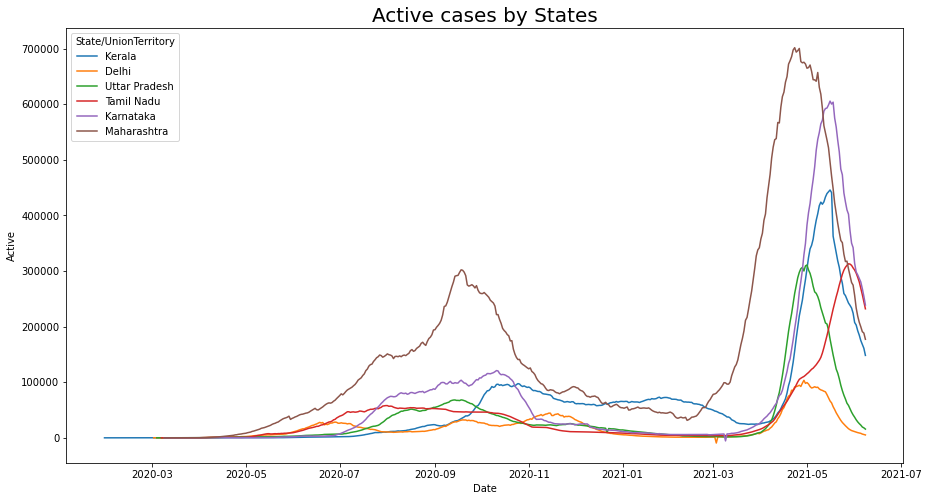

In [42]:
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=country_df[country_df['State/UnionTerritory'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra','Uttar Pradesh','Karnataka'])],x='Date',y='Active',hue='State/UnionTerritory')
ax.set_title("Active cases by States", size=20)
plt.show()

In [44]:
india_cases = country_df[country_df['Date'] == country_df['Date'].max()].copy().fillna(0)
india_cases.index = india_cases["State/UnionTerritory"]
india_cases = india_cases.drop(['State/UnionTerritory','Date'], axis=1)

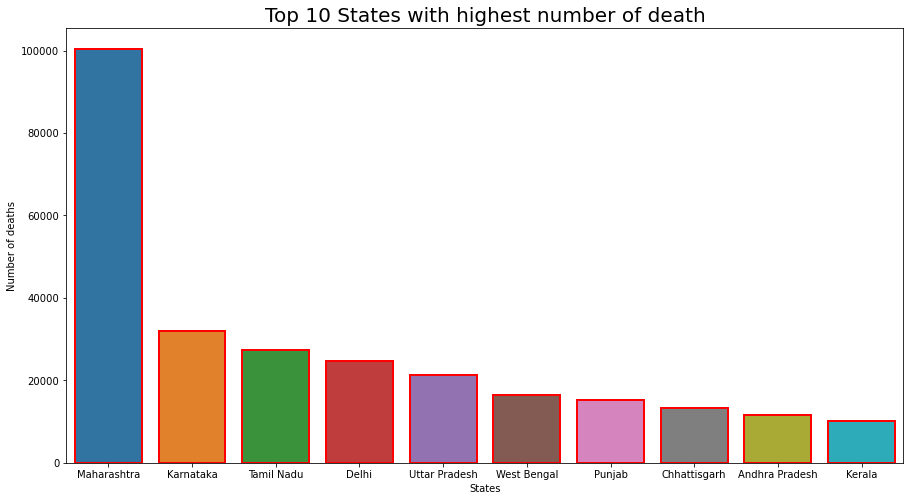

In [45]:
top_10_death_states = india_cases.sort_values('Deaths',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of death", size=20)
plt.xlabel("states")
plt.ylabel("Number of deaths in thousands")
ax=sns.barplot(data=top_10_death_states.iloc[:10],y=top_10_death_states.Deaths,x=top_10_death_states.index, linewidth=2, edgecolor='Red').set(xlabel='States', ylabel='Number of deaths')
plt.show()